In [1]:
import numpy as np

In [2]:
# Initial Setup
import sys
sys.path.append('../src')

import setup

In [3]:
pwd

'/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Learning/DS_ML_LearningPath/Projects/Project_Customer_Segmentation/notebooks'

In [4]:
# Data Retrieval
from data import download_data
df = download_data('../data/raw/telecom_users.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [6]:
# Data Preprocessing
from dataframe_preprocess import preprocess_data, save_data
df = preprocess_data(df)
save_data(df, '../data/processed/telecom_users.csv')


The first column is not the index, it is: gender

24 duplicate rows found.
Duplicates removed.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 5962 entries, 1869 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5962 non-null   object 
 1   SeniorCitizen     5962 non-null   int64  
 2   Married           5962 non-null   object 
 3   Children          5962 non-null   object 
 4   tenure            5962 non-null   int64  
 5   PhoneService      5962 non-null   object 
 6   MultipleLines     5962 non-null   object 
 7   InternetService   5962 non-null   object 
 8   OnlineSecurity    5962 non-null   object 
 9   OnlineBackup      5962 non-null   object 
 10  DeviceProtection  5962 non-null   object 
 11  TechSupport       5962 non-null   object 
 12  StreamingTV       5962 non-null   object 
 13  StreamingMovies   5962 non-null   object 
 14  Contract          5962 non

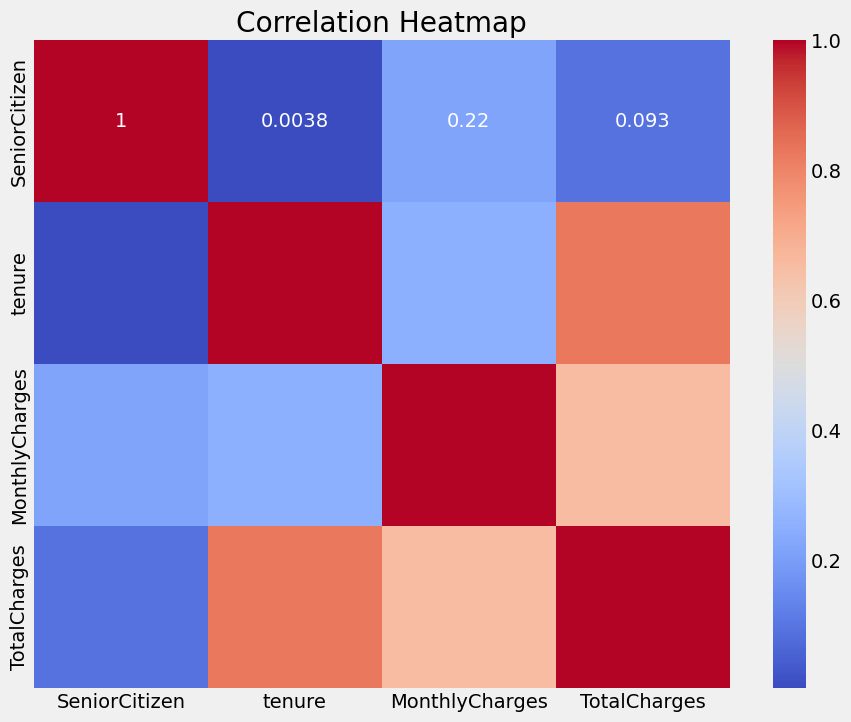

--------------------Gender-------------------------
        total   percent
gender                 
Male     3033  0.508722
Female   2929  0.491278




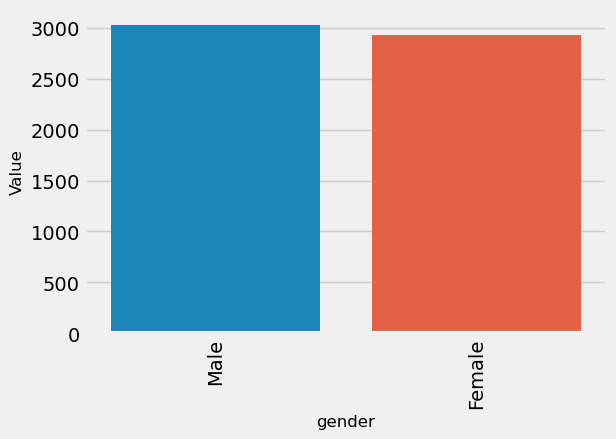

--------------------Married-------------------------
         total   percent
Married                 
No        3058  0.512915
Yes       2904  0.487085




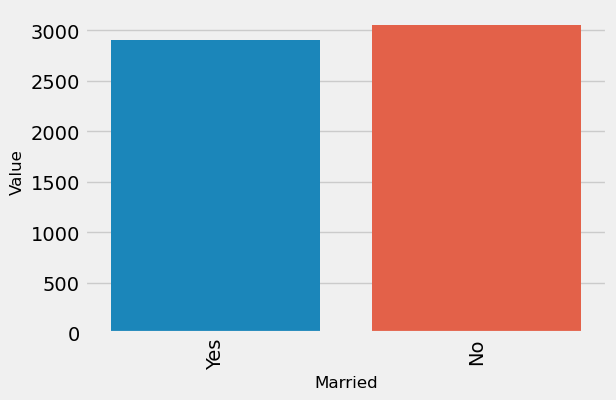

--------------------Children-------------------------
          total   percent
Children                 
No         4171  0.699597
Yes        1791  0.300403




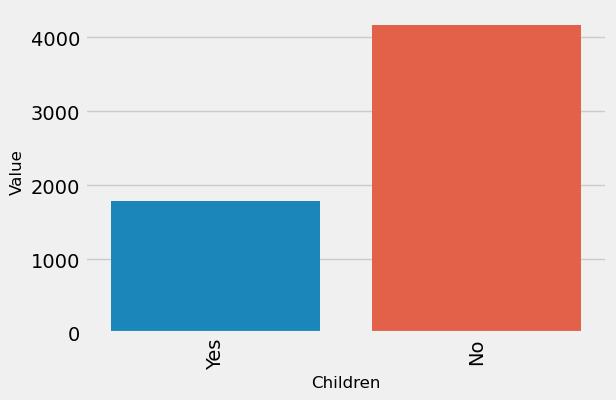

--------------------Phoneservice-------------------------
              total  percent
PhoneService                
Yes            5372  0.90104
No              590  0.09896




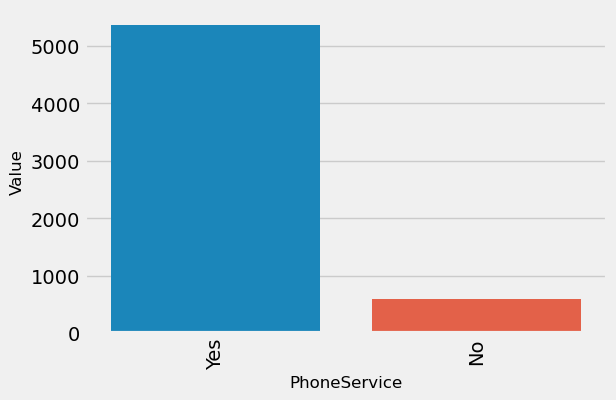

--------------------Multiplelines-------------------------
               total   percent
MultipleLines                 
No              3414  0.572627
Yes             2548  0.427373




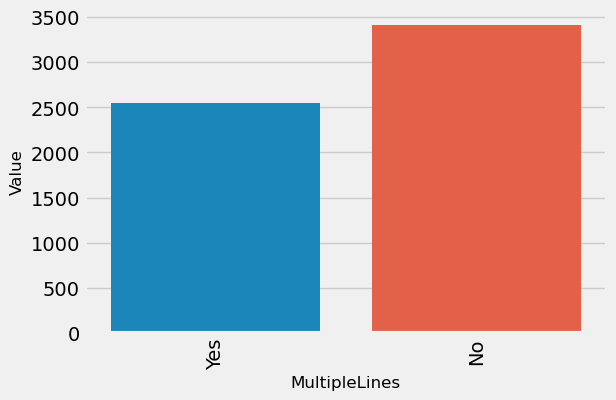

--------------------Internetservice-------------------------
                 total   percent
InternetService                 
Fiber optic       2622  0.439785
DSL               2065  0.346360
No                1275  0.213854




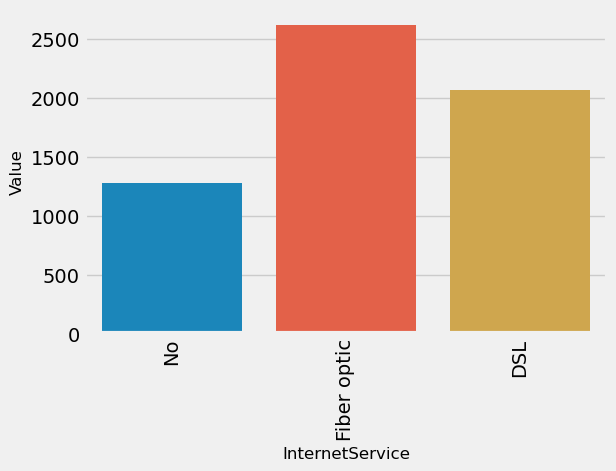

--------------------Onlinesecurity-------------------------
                total  percent
OnlineSecurity                
No               4249  0.71268
Yes              1713  0.28732




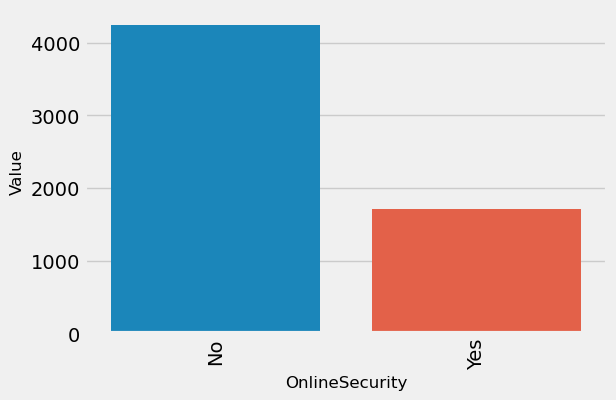

--------------------Onlinebackup-------------------------
              total   percent
OnlineBackup                 
No             3872  0.649446
Yes            2090  0.350554




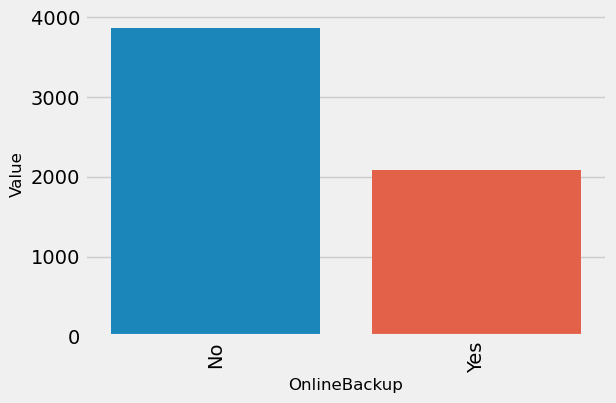

--------------------Deviceprotection-------------------------
                  total   percent
DeviceProtection                 
No                 3907  0.655317
Yes                2055  0.344683




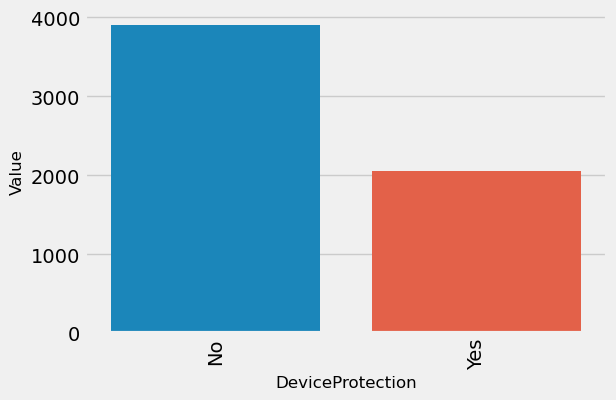

--------------------Techsupport-------------------------
             total  percent
TechSupport                
No            4227  0.70899
Yes           1735  0.29101




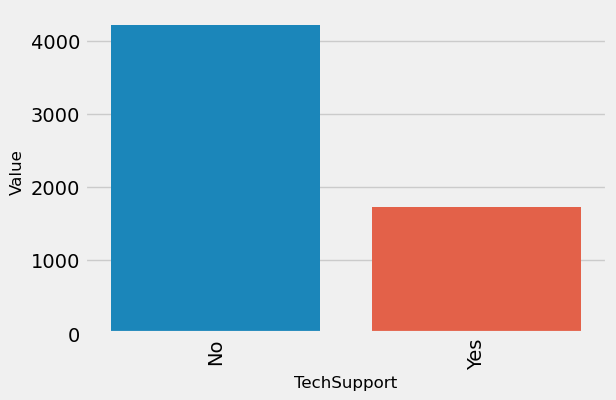

--------------------Streamingtv-------------------------
             total   percent
StreamingTV                 
No            3656  0.613217
Yes           2306  0.386783




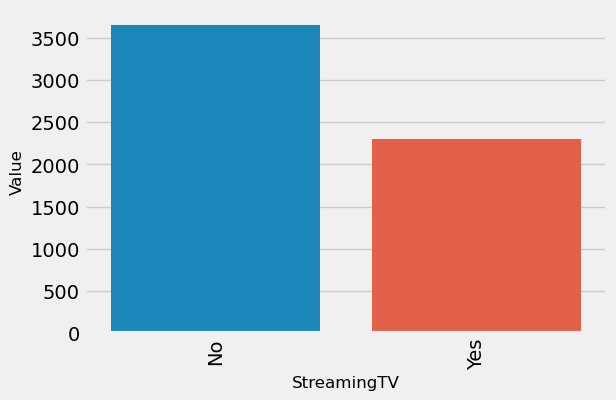

--------------------Streamingmovies-------------------------
                 total   percent
StreamingMovies                 
No                3623  0.607682
Yes               2339  0.392318




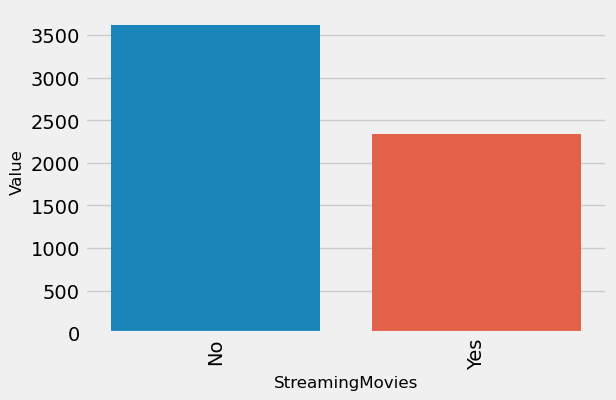

--------------------Contract-------------------------
                total   percent
Contract                       
Month-to-month   3245  0.544280
Two year         1441  0.241697
One year         1276  0.214022




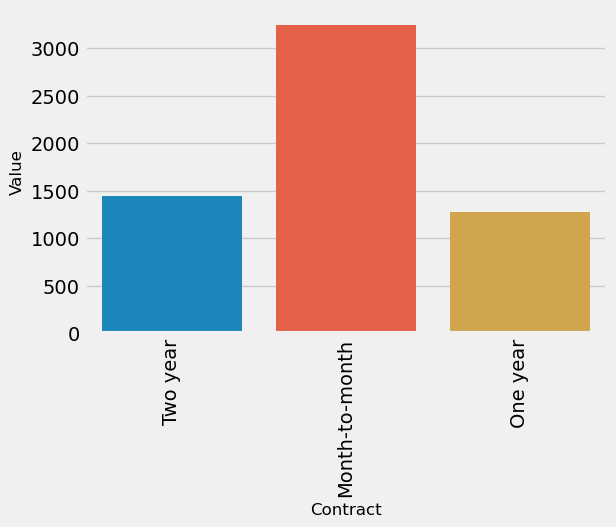

--------------------Paymentmethod-------------------------
                           total   percent
PaymentMethod                             
Electronic check            2001  0.335626
Mailed check                1350  0.226434
Bank transfer (automatic)   1308  0.219389
Credit card (automatic)     1303  0.218551




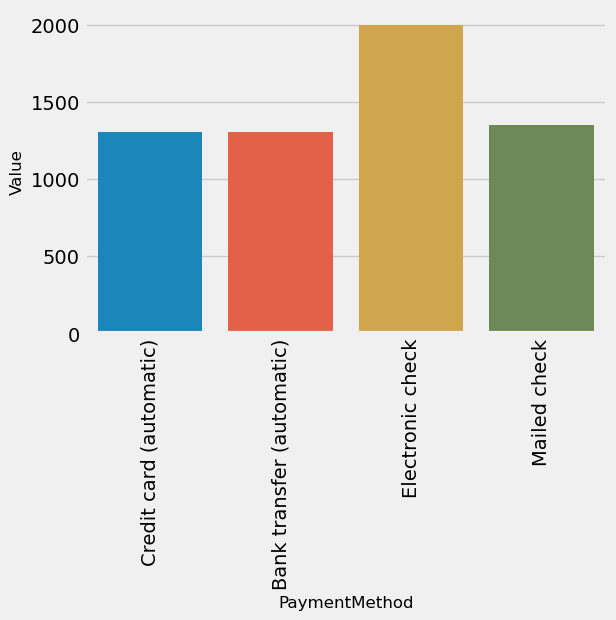

--------------------Churn-------------------------
       total   percent
Churn                 
No      4388  0.735995
Yes     1574  0.264005




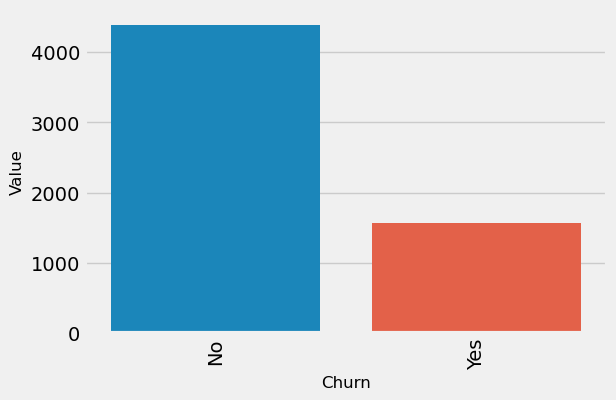

--------------------Numerical features -------------------------


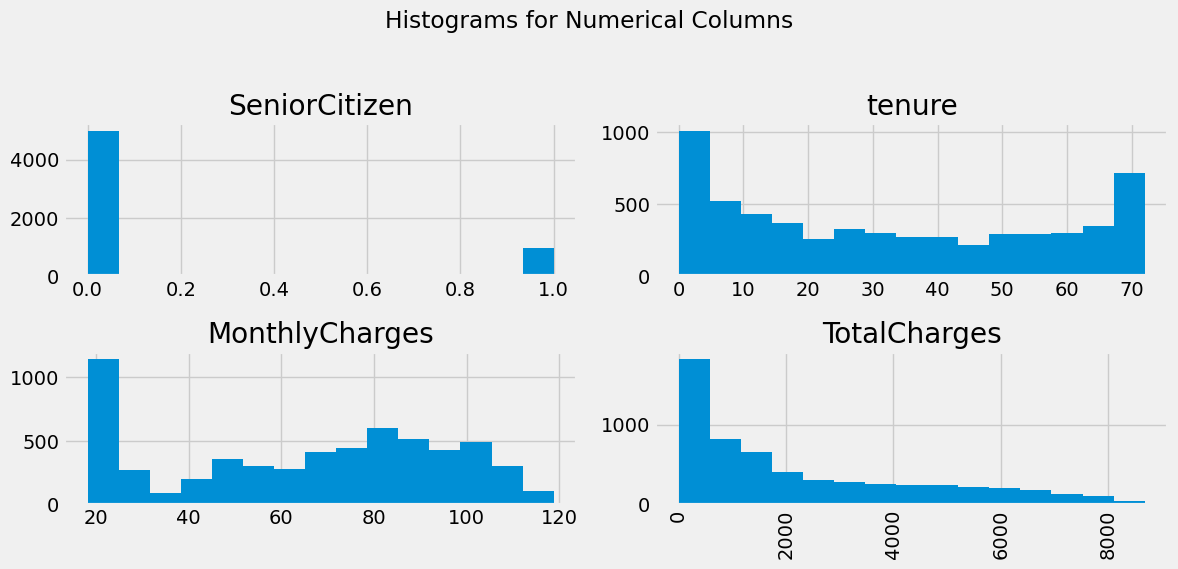

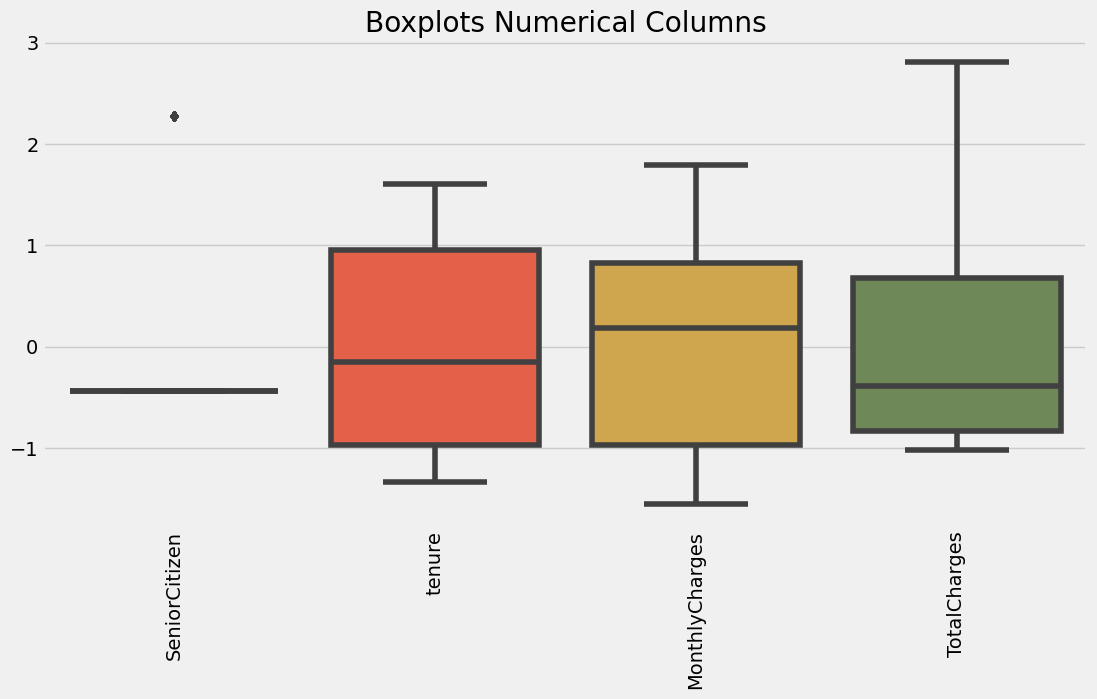

In [7]:
# Data Exploration

from analyze_data import analyze_dataframe

analyze_dataframe(df)


For n_clusters = 2, The average silhouette_score is : 0.2228
For n_clusters = 3, The average silhouette_score is : 0.1677
For n_clusters = 4, The average silhouette_score is : 0.1722
For n_clusters = 5, The average silhouette_score is : 0.1497
For n_clusters = 6, The average silhouette_score is : 0.1508
For n_clusters = 7, The average silhouette_score is : 0.145
For n_clusters = 8, The average silhouette_score is : 0.1431
For n_clusters = 9, The average silhouette_score is : 0.1306
For n_clusters = 10, The average silhouette_score is : 0.1279


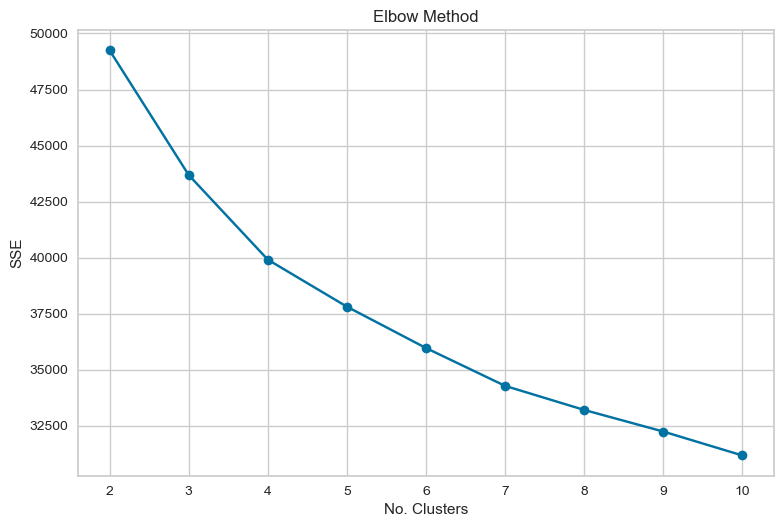

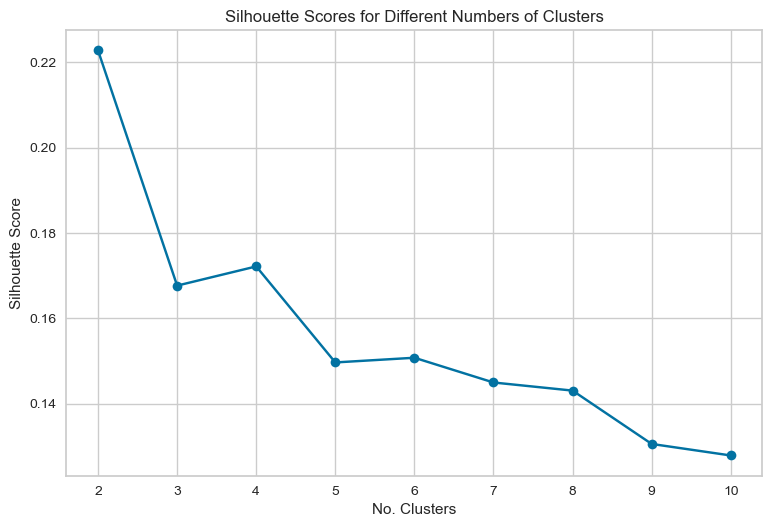

In [8]:
# Modeling
from model import fit_kmeans, silhuette_score
cluster_errors = []
for n_clusters in range(2, 11):
    wcsse = fit_kmeans(n_clusters, df)
    cluster_errors.append(wcsse)

silhuette_s = silhuette_score(n_clusters, df)
from evaluate import plot_elbow, plot_silhouette
plot_elbow(cluster_errors)
plot_silhouette(silhuette_s)
#print(silhuette_s)

In [9]:
# Modelling and prediction
#from data import preprocess
from sklearn.metrics import classification_report
from pycaret.classification import *
from model import train_and_evaluate_model


# Assuming df is already loaded
#X, y = define_features_labels(df)
#X_train, X_test, y_train, y_test = perform_train_test_split(X, y)

# Assuming 'df' is your DataFrame containing the data
fitted_and_tuned_model, X_test, y_test = train_and_evaluate_model(df)

# Make predictions using the tuned model


,Description,Value
0,Session id,9
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(4769, 19)"
5,Transformed data shape,"(6367, 26)"
6,Transformed train set shape,"(4936, 26)"
7,Transformed test set shape,"(1431, 26)"
8,Numeric features,4
9,Categorical features,14


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8065,0.8494,0.8065,0.8050,0.8056,0.4935,0.4937,0.1660
lr,Logistic Regression,0.8023,0.8512,0.8023,0.8093,0.8051,0.5027,0.5039,0.5780
lda,Linear Discriminant Analysis,0.8008,0.8508,0.8008,0.8101,0.8044,0.5035,0.5054,0.0400
ridge,Ridge Classifier,0.7999,0.8509,0.7999,0.8093,0.8035,0.5014,0.5033,0.0320
ada,Ada Boost Classifier,0.7999,0.8435,0.7999,0.8033,0.8014,0.4888,0.4892,0.0680
lightgbm,Light Gradient Boosting Machine,0.8014,0.0000,0.8014,0.7950,0.7972,0.4643,0.4662,0.2800
rf,Random Forest Classifier,0.7963,0.0000,0.7963,0.7880,0.7905,0.4440,0.4469,0.0920
svm,SVM - Linear Kernel,0.7732,0.8250,0.7732,0.7860,0.7776,0.4380,0.4414,0.2760
et,Extra Trees Classifier,0.7789,0.0000,0.7789,0.7723,0.7748,0.4065,0.4079,0.0980
nb,Naive Bayes,0.7337,0.0000,0.7337,0.8037,0.7489,0.4276,0.4580,0.0340


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7904,0.8514,0.7904,0.7822,0.7851,0.4306,0.4326
1,0.7904,0.8356,0.7904,0.8009,0.7946,0.4793,0.4812
2,0.8293,0.8690,0.8293,0.8254,0.8270,0.5452,0.5460
3,0.8084,0.8385,0.8084,0.8044,0.8061,0.4913,0.4918
4,0.8293,0.8856,0.8293,0.8264,0.8277,0.5486,0.5491
5,0.7904,0.8154,0.7904,0.7971,0.7933,0.4717,0.4726
6,0.7904,0.8145,0.7904,0.7904,0.7904,0.4560,0.4560
7,0.8234,0.8714,0.8234,0.8269,0.8249,0.5499,0.5503
8,0.7988,0.8543,0.7988,0.8062,0.8019,0.4956,0.4968


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


KeyError: 'Churn'